# Image Classification
In this project, you'll classify images from the CIFAR-10 dataset
(https://www.cs.toronto.edu/~kriz/cifar.html). The dataset consists of airplanes, dogs, cats, and other
objects. 

You'll preprocess the images, then train a convolutional neural network on all the samples.
The images need to be normalized and the labels need to be one-hot encoded. You'll get to apply
what you learned and build a convolutional, max pooling, dropout, and fully connected layers. At the
end, you'll get to see your neural network's predictions on the sample images.

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from keras.optimizers import SGD
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10
import tensorflow as tf

# Data
CIFAR-10 is an established computer-vision dataset used for object recognition. 

It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10
object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and
Geoffrey Hinton.

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
# Transofrm them to a float32 type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the input 
X_train /= 255
X_test /= 255

# Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory. The
CIFAR-10 dataset consists of 5 batches, named data_batch_1, data_batch_2, etc.. Each batch
contains the labels and images that are one of the following:
* airplane
*automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck
Understanding a dataset is part of making predictions on the data. Play around with the code cell
below by changing the batch_id and sample_id. The batch_id is the id for a batch (1-5). 

The sample_id is the id for a image and label pair in the batch.
Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are
the labels in order or random?". Answers to questions like these will help you preprocess the data
and end up with better predictions.

In [5]:
labels = [ 'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck']
for i in range(len(labels)):
  print(str(i)+" : "+labels[i])

0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck


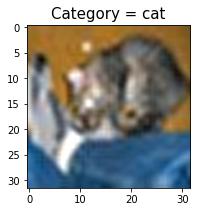

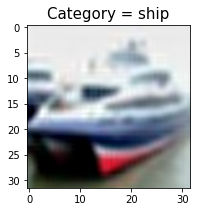

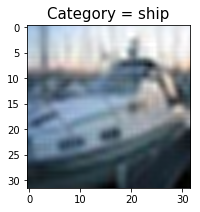

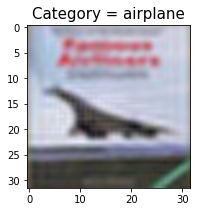

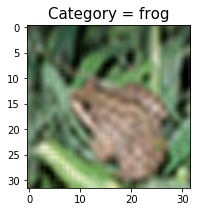

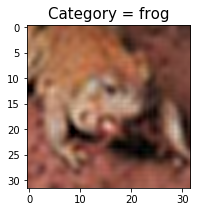

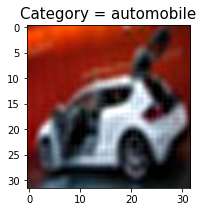

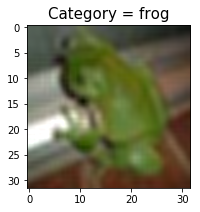

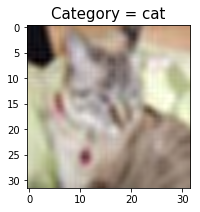

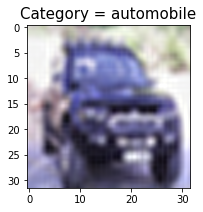

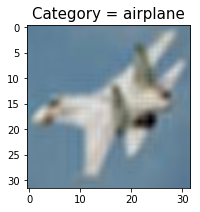

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline
def  plot_CIFAR(ind):
    arr = X_test[ind]
    
 
    img = arr
    title = labels[y_test[ind][0]]
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='sinc')
    ax.set_title('Category = '+ title,fontsize =15)
    
for i in range(11) :
    plot_CIFAR(i)

In [7]:
# Convert and pre-processing
from keras.utils import np_utils
#one hot encoding of target labels
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [8]:
X_train.shape[1:]

(32, 32, 3)

In [12]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',activation='relu',input_shape=X_train.shape[1:]))
#model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
#add output layer
model.add(Dense(10,activation=tf.nn.softmax))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator
#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)
batch_size =32
epochs = 10
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 628s 402ms/step - loss: 1.5681 - acc: 0.4254 - val_loss: 1.2032 - val_acc: 0.5626
Epoch 2/10
1563/1563 [==============================] - 627s 401ms/step - loss: 1.2358 - acc: 0.5545 - val_loss: 0.9959 - val_acc: 0.6415
Epoch 3/10
1563/1563 [==============================] - 620s 397ms/step - loss: 1.1028 - acc: 0.6084 - val_loss: 0.9198 - val_acc: 0.6765
Epoch 4/10
1563/1563 [==============================] - 613s 392ms/step - loss: 1.0226 - acc: 0.6406 - val_loss: 0.8861 - val_acc: 0.6900
Epoch 5/10
1563/1563 [==============================] - 614s 393ms/step - loss: 0.9650 - acc: 0.6585 - val_loss: 0.8425 - val_acc: 0.7018
Epoch 6/10
1563/1563 [==============================] - 622s 398ms/step - loss: 0.9277 - acc: 0.6757 - val_loss: 0.8041 - val_acc: 0.7223
Epoch 7/10
1563/1563 [==============================] - 646s 413ms/step - loss: 0.9043 - acc: 0.6831 - val_loss: 0.7556 - val_acc: 0.7379
Epoch 8/10
1563/1563 [============

In [20]:
Y_pred = model.predict(X_test)

In [21]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [22]:
Y_pred

array([[5.18789602e-06, 4.15573304e-05, 8.18756162e-05, ...,
        1.11853451e-05, 1.13048486e-03, 1.19626684e-05],
       [1.25151317e-04, 5.39924145e-01, 5.01491826e-09, ...,
        1.68884405e-12, 4.58603650e-01, 1.34711363e-03],
       [3.39531973e-02, 4.35210675e-01, 1.79489871e-04, ...,
        6.32890660e-05, 5.16794324e-01, 1.32305762e-02],
       ...,
       [3.05236017e-06, 1.95616872e-06, 4.25989041e-03, ...,
        2.11323076e-03, 5.92965580e-06, 1.79385534e-05],
       [1.05776075e-04, 9.99738753e-01, 1.54881454e-05, ...,
        8.68306742e-08, 9.42254974e-06, 1.18725977e-04],
       [1.04408890e-07, 2.23783525e-09, 3.07830533e-06, ...,
        9.98121321e-01, 1.32329842e-10, 6.85490420e-09]], dtype=float32)

In [28]:
y_pred = []
for i in Y_pred:
    j = []
    for k in i:
        if k > 0.5:
            j.append(1)
        else:
            j.append(0)
    y_pred.append(j)
            
    

##### Retrieve Predictions

In [29]:
y_pred

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0,

#### Evaluate the predictions

In [35]:
labels[np.argmax(y_test[0])]

'cat'

In [36]:
labels[np.argmax(y_pred[0])]

'cat'

In [37]:
labels[np.argmax(y_test[1])]

'ship'

In [38]:
labels[np.argmax(y_pred[1])]

'automobile'

In [39]:
actual = []
for i in y_test:
    actual.append(np.argmax(i))

In [40]:
pred = []
for i in y_pred:
    pred.append(np.argmax(i))

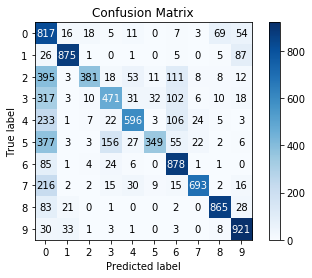

In [42]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(actual,pred)

In [47]:
print("Accuracy of the model is : ",sklearn.metrics.accuracy_score(actual,pred)*100,'%')

Accuracy of the model is :  68.46 %
